In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from pathlib import Path

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches


from matplotlib import rcParams

import numpy as np
import pandas as pd


import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import geopandas as gpd

import intro_plots as ip

paper_path = Path('../../paper/figures/')

slide_path = Path('../../slides/figures/intro/')
proposal_path = Path('../../draft/figures/intro/')
#rcParams['font.family'] = 'Segoe Print'

In [5]:
ny_all = pd.read_csv("nydata")

ny = ny_all[ny_all['NAME'].isin(ip.cdict.keys())].copy()

ny['DATES'] = pd.to_datetime(ny['DATE'])

In [6]:
nyjfk = ny[ny['NAME'].str.contains('JFK')].fillna(0)[['DATES', 'PRCPI']]

In [7]:
nyjfk['PRCPI2'] = nyjfk['PRCPI']*10

<AxesSubplot:>

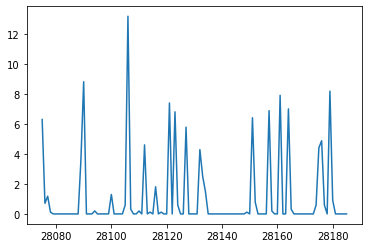

In [8]:
nyjfk['PRCPI2'].plot()

In [9]:
dfs = nyjfk[(nyjfk['DATES']>'2021-02-04') & (nyjfk['DATES']<'2021-02-10')]
dfs

,DATES,PRCPI,PRCPI2
28110,2021-02-05,0.019685,0.19685
28111,2021-02-06,0.000000,0.00000
28112,2021-02-07,0.460629,4.60629
28113,2021-02-08,0.000000,0.00000
28114,2021-02-09,0.011811,0.11811


In [10]:
dfs['L1'] = dfs['PRCPI'].apply(lambda x: f"{x:1.4f}") 
dfs['L2'] = dfs['PRCPI2'].apply(lambda x: f"{x:1.4f}") 
dfs

<ipython-input-10-e3e35708b6b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['L1'] = dfs['PRCPI'].apply(lambda x: f"{x:1.4f}")
<ipython-input-10-e3e35708b6b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['L2'] = dfs['PRCPI2'].apply(lambda x: f"{x:1.4f}")


,DATES,PRCPI,PRCPI2,L1,L2
28110,2021-02-05,0.019685,0.19685,0.0197,0.1969
28111,2021-02-06,0.000000,0.00000,0.0000,0.0000
28112,2021-02-07,0.460629,4.60629,0.4606,4.6063
28113,2021-02-08,0.000000,0.00000,0.0000,0.0000
28114,2021-02-09,0.011811,0.11811,0.0118,0.1181


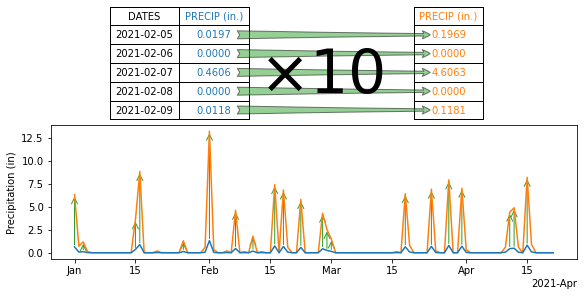

In [32]:
fig, axd = plt.subplot_mosaic([['tab1','tab2'],['time', 'time'],['time', 'time']], 
                              constrained_layout=True, figsize=(8,4))
#gridspec_kw={'width_ratios':}

ocolor = 'tab:blue'
scolor = 'tab:orange'
gcolor = 'tab:green'
table_1 = ip.plot_table(axd['tab1'], dfs[['DATES', 'L1']], ['k', ocolor], textcolor=None)
table_2 = ip.plot_table(axd['tab2'], dfs[['L2']], [scolor], textcolor=None)
fig.canvas.draw()
table_1[(0,1)].get_text().set_text('PRECIP (in.)')
table_2[(0,0)].get_text().set_text('PRECIP (in.)')

axd['time'].plot('DATES', 'PRCPI', data=nyjfk, color=ocolor, zorder=10)
axd['time'].plot('DATES', 'PRCPI2', data=nyjfk, color=scolor, zorder=9)
axd['time'].xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.MonthLocator()))
axd['time'].set_ylabel("Precipitation (in)")

for (i, (d, t1, t2)) in nyjfk[['DATES', 'PRCPI', 'PRCPI2']].iterrows():
    if t2<1: continue
    a1 = mpatches.FancyArrowPatch((d, t1), (d,t2), arrowstyle="->",  
                                  linestyle=None, mutation_scale=15, lw=1, color=gcolor)
    axd['time'].add_artist(a1)


for i in range(1,len(dfs)+1):
    x1, y1 = ip.source_cell(table_1[i,1], ocolor, xr=1.1)
    x2, y2 = ip.source_cell(table_2[i,0], scolor, xr=.05)
    
    arrow = mpatches.ConnectionPatch(xyA=(x1, y1), coordsA=axd['tab1'].transData,
                                     xyB=(x2, y2), coordsB=axd['tab2'].transData,   
                                     arrowstyle="fancy", mutation_scale=20, 
                                     facecolor=gcolor, edgecolor='black', alpha=.5)
    fig.add_artist(arrow)
    
fig.text(.55, .75, r"$\times 10$", ha='center', va='center', fontsize=60)
fig.savefig(proposal_path/"equivariant.png")